# BUGSrad Visualization Notebook
1. Plot Profile Quantities
2. Run BUGSrad
3. Display Flux Profile

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from bugsrad_module import *

In [2]:
profFile = '../profiles/input/profile_fiona2_20_ar.txt'
Prof = read_profile(profFile)

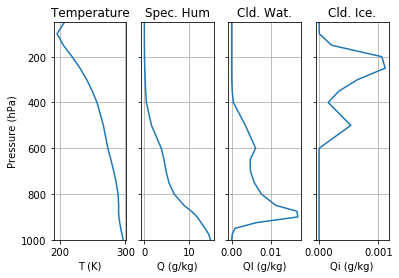

In [3]:
# Plot Meteorological Profile
f, (ax1, ax2, ax3, ax4 ) = plt.subplots(nrows=1, ncols=4, sharey=True)
ax1.set_title('Temperature')
ax1.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax1.set_ylabel('Pressure (hPa)')
ax1.grid(True)
ax1.set_xlabel('T (K)')
ax1.plot(Prof["t"], Prof["p"])
ax2.set_title('Spec. Hum')
ax2.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax2.grid(True)
ax2.plot(Prof["q"]*1000., Prof["p"])
ax2.set_xlabel('Q (g/kg)')
ax3.set_title('Cld. Wat.')
ax3.plot(Prof["ql"]*1000., Prof["p"])
ax3.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax3.grid(True)
ax3.set_xlabel('Ql (g/kg)')
ax4.set_title('Cld. Ice.')
ax4.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax4.grid(True)
ax4.set_xlabel('Qi (g/kg)')
ax4.plot(Prof["qi"]*1000., Prof["p"])

# Run BUGSrad

In [4]:
#Surface Properties
TSI = 1361. #solar constant [W/m2]
theta = 0.5 #cosine of solar zenith angle
Ts = 300. #surface temperature [K]
emis = 1.0 #emissivity of surface; black body = 1
asfcdir = 0.15 #albedo for direct radiation
asfcdif = 0.15 #albedo for diffuse radiation

#Profile
Z_p = Prof["z"]
P_p = Prof["p"]
T_p = Prof["t"]
Q_p = Prof["q"]
Ql_p = Prof["ql"]
Qi_p = Prof["qi"]
Qr_p = Prof["qr"]
O3Val = 2.23930500e-07
O3_p = np.asarray([O3Val for i in range(len(Z_p))])

In [5]:
#Create input ascii file for BUGSrad
BUGSrad_inFile = '../profiles/bugsrad_input.txt'
f = open(BUGSrad_inFile, 'w')
f.write(str(TSI)+','+str(theta)+','+str(Ts)+','+str(emis)+','+str(asfcdir)+','+str(asfcdif)+'\n')
for i in range(len(Z_p)):
    f.write(str(Z_p[i])+ ',' +str(P_p[i])+ ',' +str(T_p[i])+ ',' +str(Q_p[i])+ ',' +str(Ql_p[i])+ ',' +str(Qi_p[i])+ ',' +str(Qr_p[i])+ ',' +str(O3_p[i]) + '\n')
f.close()

In [6]:
BUGSrad_exe = '../code/process_bugsrad'
BUGSrad_File = '../profiles/output/bugsrad.txt'
print(BUGSrad_exe+' '+BUGSrad_inFile+' '+BUGSrad_File)
os.system(BUGSrad_exe+' '+BUGSrad_inFile+' '+BUGSrad_File)

../code/process_bugsrad ../profiles/bugsrad_input.txt ../profiles/output/bugsrad.txt


0

In [7]:
#Read output from BUGSrad
rad = read_bugsrad(BUGSrad_File)

In [8]:
LID = 0
print('TOA SHORTWAVE DOWNWELLING = ',(rad["swdn"])[LID],'W/m^2')
print('TOA SHORTWAVE UPWELLING = '  ,(rad["swup"])[LID],'W/m^2')
print('TOA LONGWAVE DOWNWELLING = ' ,(rad["lwdn"])[LID],'W/m^2')
print('TOA LONGWAVE UPWELLING = '   ,(rad["lwup"])[LID],'W/m^2')
print('TOA SHORTWAVE DOWNWELLING (CLEARSKY) = ',(rad["swdn_clr"])[LID],'W/m^2')
print('TOA SHORTWAVE UPWELLING (CLEARSKY) = '  ,(rad["swup_clr"])[LID],'W/m^2')
print('TOA LONGWAVE DOWNWELLING (CLEARSKY) = ' ,(rad["lwdn_clr"])[LID],'W/m^2')
print('TOA LONGWAVE UPWELLING (CLEARSKY) = '   ,(rad["lwup_clr"])[LID],'W/m^2')

TOA SHORTWAVE DOWNWELLING =  680.5 W/m^2
TOA SHORTWAVE UPWELLING =  290.8 W/m^2
TOA LONGWAVE DOWNWELLING =  0.0 W/m^2
TOA LONGWAVE UPWELLING =  228.4 W/m^2
TOA SHORTWAVE DOWNWELLING (CLEARSKY) =  680.5 W/m^2
TOA SHORTWAVE UPWELLING (CLEARSKY) =  129.1 W/m^2
TOA LONGWAVE DOWNWELLING (CLEARSKY) =  0.0 W/m^2
TOA LONGWAVE UPWELLING (CLEARSKY) =  277.7 W/m^2


In [9]:
LID = len(rad["swdn"])-1
print('BOA SHORTWAVE DOWNWELLING = ',(rad["swdn"])[LID],'W/m^2')
print('BOA SHORTWAVE UPWELLING = '  ,(rad["swup"])[LID],'W/m^2')
print('BOA LONGWAVE DOWNWELLING = ' ,(rad["lwdn"])[LID],'W/m^2')
print('BOA LONGWAVE UPWELLING = '   ,(rad["lwup"])[LID],'W/m^2')
print('BOA SHORTWAVE DOWNWELLING (CLEARSKY) = ',(rad["swdn_clr"])[LID],'W/m^2')
print('BOA SHORTWAVE UPWELLING (CLEARSKY) = '  ,(rad["swup_clr"])[LID],'W/m^2')
print('BOA LONGWAVE DOWNWELLING (CLEARSKY) = ' ,(rad["lwdn_clr"])[LID],'W/m^2')
print('BOA LONGWAVE UPWELLING (CLEARSKY) = '   ,(rad["lwup_clr"])[LID],'W/m^2')

BOA SHORTWAVE DOWNWELLING =  307.1 W/m^2
BOA SHORTWAVE UPWELLING =  46.1 W/m^2
BOA LONGWAVE DOWNWELLING =  435.8 W/m^2
BOA LONGWAVE UPWELLING =  459.3 W/m^2
BOA SHORTWAVE DOWNWELLING (CLEARSKY) =  493.3 W/m^2
BOA SHORTWAVE UPWELLING (CLEARSKY) =  74.0 W/m^2
BOA LONGWAVE DOWNWELLING (CLEARSKY) =  396.2 W/m^2
BOA LONGWAVE UPWELLING (CLEARSKY) =  459.3 W/m^2


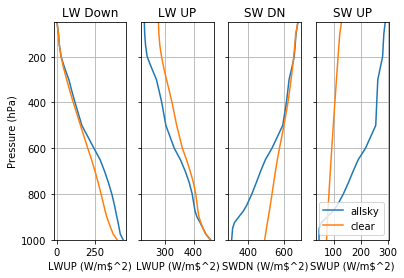

In [10]:
# Plot Meteorological Profile
f, (ax1, ax2, ax3, ax4 ) = plt.subplots(nrows=1, ncols=4, sharey=True)
ax1.set_title('LW Down')
ax1.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax1.set_ylabel('Pressure (hPa)')
ax1.grid(True)
ax1.set_xlabel('LWDN (W/m$^2)')
ax1.plot(rad["lwdn"], Prof["p"])
ax1.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax1.set_ylabel('Pressure (hPa)')
ax1.grid(True)
ax1.set_xlabel('LWUP (W/m$^2)')
ax1.plot(rad["lwdn_clr"], Prof["p"])

ax2.set_title('LW UP')
ax2.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax2.grid(True)
ax2.set_xlabel('LWDN (W/m$^2)')
ax2.plot(rad["lwup"], Prof["p"])
ax2.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax2.grid(True)
ax2.set_xlabel('LWUP (W/m$^2)')
ax2.plot(rad["lwup_clr"], Prof["p"])

ax3.set_title('SW DN')
ax3.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax3.grid(True)
ax3.set_xlabel('SWDN (W/m$^2)')
ax3.plot(rad["swdn"], Prof["p"])
ax3.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax3.grid(True)
ax3.set_xlabel('SWDN (W/m$^2)')
ax3.plot(rad["swdn_clr"], Prof["p"])

ax4.set_title('SW UP')
ax4.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax4.grid(True)
ax4.set_xlabel('SWUP (W/m$^2)')
ax4.plot(rad["swup"], Prof["p"], label='allsky')
ax4.set_ylim([np.max(Prof["p"]),np.min(Prof["p"])])
ax4.grid(True)
ax4.set_xlabel('SWUP (W/m$^2)')
ax4.plot(rad["swup_clr"], Prof["p"], label='clear')
ax4.legend(loc='lower right')